# "GesturePlay: Real-Time Rock-Paper-Scissors with AI"

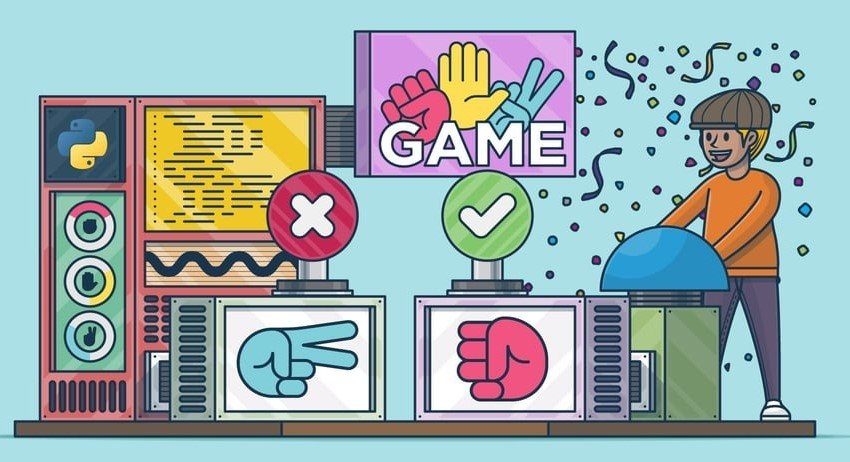

# Import tensorflow

In [1]:
pip install tensorflow opencv-python


Note: you may need to restart the kernel to use updated packages.


# Define a function to preprocess images for model prediction

In [16]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up paths for training and test data
train_dir = r'C:\Users\Hamidreza\OneDrive\Desktop\Game data set\train'
test_dir = r'C:\Users\Hamidreza\OneDrive\Desktop\Game data set\test'

# Image augmentation and generator setup for training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='sparse')

# Flow test images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='sparse',
    shuffle=False)


Found 810 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


# Model architecture with Input layer

In [13]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(150, 150, 3)),  # Explicit Input layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])


# Compile the model

In [17]:

from tensorflow.keras.optimizers import Adam

# Adjust learning rate
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Training Model

In [21]:
# Import necessary components
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping



# Set up an EarlyStopping callback

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)


# Train the model with early stopping
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator,
    verbose=1,
    callbacks=[early_stopping]
)



Epoch 1/25


C:\Users\Hamidreza\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 56s 947ms/step - accuracy: 0.3571 - loss: 1.1103 - val_accuracy: 0.3444 - val_loss: 1.0600
Epoch 2/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 880ms/step - accuracy: 0.4182 - loss: 1.0623 - val_accuracy: 0.5444 - val_loss: 0.9330
Epoch 3/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 866ms/step - accuracy: 0.5574 - loss: 0.9784 - val_accuracy: 0.6444 - val_loss: 0.7818
Epoch 4/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 877ms/step - accuracy: 0.6497 - loss: 0.8058 - val_accuracy: 0.6000 - val_loss: 0.7131
Epoch 5/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 901ms/step - accuracy: 0.6357 - loss: 0.7551 - val_accuracy: 0.8667 - val_loss: 0.4978
Epoch 6/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 901ms/step - accuracy: 0.6948 - loss: 0.6427 - val_accuracy: 0.8778 - val_loss: 0.4478
Epoch 7/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7404 - loss: 0.5750 - val_accuracy: 0.9222 - val_loss: 0.3570
Epoch 8/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 44s 994ms/step - accuracy: 0.7703 - loss: 0.5670 - val_accuracy: 0.9556 -

# Saving the model in the recommended Keras format after training


In [22]:
model.save('rps_model.keras')

# This load step is generally used in a different script or a later stage
# Load the model from the Keras format (if needed later)
# model = load_model('rps_model.keras')

# Evaluate the model on the test data

In [23]:

evaluation = model.evaluate(test_generator)
print(f'Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}')



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9451 - loss: 0.1693
Test Loss: 0.11226572096347809, Test Accuracy: 0.9666666388511658


## Importing Libraries and Loading the Model 

In [27]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the model saved in the Keras format
model = load_model('rps_model.keras')




##  Initialize the Game Variables

In [28]:
# Game variables
gestures = ['rock', 'paper', 'scissors']
AI_scores = 0
user_scores = 0
rounds_played = 0



##  Define Utility Functions

In [ ]:
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, (150, 150))  # Resize to match the model's expected input
    image = image.astype('float32') / 255  # Scale pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def get_prediction(preprocessed_image, model):
    prediction = model.predict(preprocessed_image)
    return np.argmax(prediction)

def get_ai_choice():
    return np.random.choice(gestures)

def determine_winner(user_choice, ai_choice):
    results = {
        ('rock', 'scissors'): 'User',
        ('paper', 'rock'): 'User',
        ('scissors', 'paper'): 'User',
        ('scissors', 'rock'): 'AI',
        ('rock', 'paper'): 'AI',
        ('paper', 'scissors'): 'AI'
    }
    return results.get((user_choice, ai_choice), 'Draw')



## Game Loop

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def preprocess_image(image):
    # Convert image to RGB, resize, normalize and add batch dimension
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, (150, 150))  # Resize to match the model's expected input
    image = image.astype('float32') / 255  # Normalize pixel values to 0-1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def get_prediction(preprocessed_image, model):
    prediction = model.predict(preprocessed_image)
    return np.argmax(prediction)

def get_ai_choice():
    return np.random.choice(['rock', 'paper', 'scissors'])

def determine_winner(user_choice, ai_choice):
    results = {
        ('rock', 'scissors'): 'User',
        ('paper', 'rock'): 'User',
        ('scissors', 'paper'): 'User',
        ('scissors', 'rock'): 'AI',
        ('rock', 'paper'): 'AI',
        ('paper', 'scissors'): 'AI'
    }
    return results.get((user_choice, ai_choice), 'Draw')

# Load the trained model
model = load_model('rps_model.keras')

# Open the webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

user_scores, AI_scores, rounds_played = 0, 0, 0
max_rounds = 3

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Define the region where the user should place their hand
    height, width, _ = frame.shape
    top_left = (width // 2 - 150, height // 2 - 150)
    bottom_right = (width // 2 + 150, height // 2 + 150)

    # Draw a rectangle to guide the user
    cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 3)
    cv2.putText(frame, 'Place hand in the box and press "s" when ready, "q" to quit', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.imshow('Rock, Paper, Scissors', frame)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('s') and rounds_played < max_rounds:
        hand_region = frame[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
        preprocessed_image = preprocess_image(hand_region)
        user_choice = ['rock', 'paper', 'scissors'][get_prediction(preprocessed_image, model)]
        ai_choice = get_ai_choice()
        winner = determine_winner(user_choice, ai_choice)

        # Update the scores based on the winner
        if winner == 'User':
            user_scores += 1
        elif winner == 'AI':
            AI_scores += 1

        rounds_played += 1

        # Display results on the frame
        result_text = f"Your gesture: {user_choice}, AI's gesture: {ai_choice}, Winner: {winner}"
        cv2.putText(frame, result_text, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        cv2.imshow('Rock, Paper, Scissors - Results', frame)
        cv2.waitKey(2000)  # Display the result for 2 seconds

        if rounds_played >= max_rounds:
            print(f"Final Results - You: {user_scores}, AI: {AI_scores}")
            break  # Exit after the final round

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Final Results - You: 0, AI: 0
